# Vehicle Collision Dataset Analysis: Seattle Department of Transportation (SDOT)

According to the annual United States road crash statistics by ASIRT, more than 38,000 people die every year in crashes on U.S. roadways. The U.S. traffic fatality rate is 12.4 deaths per 100,000 inhabitants. It is evident that with the increasing number of vehicles on urban and suburban roads, the cases of vehicle accidents are also increasing. This project aims to analyse vehicle collision data available in public domain provided by Seattle Geo Data (SDOT) and derive some useful insights. <br>
Data provided by the Seattle Department of Transportation (SDOT) on vehicle collisions along with its severity might be useful to derive insights and may show some pattern with the environmental factors like weather, road conditions etc. <br>
The dataset consists of 40 columns having different kinds of data like, collision severity, road conditions, number of people involved, location of collision, weather etc. Meta-data of the dataset can be viewed https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

## Important Insights

<b>
    1. 62% of accidents belong to category "Property Damage Only Collision" while 26% belong to category "Injury Collision" <br>
    2. 50% of accidents tend to happen between 12:00 P.M. to 8:00 P.M.<br>
    3. Between 00:00 to 04:00, cases of severity 1 ("Property damage only collision") incidents are higher than rest of the day percentage wise<br>
    4. 11% of all cases in late night are due to speeding <br>
    5. ~18% of collisions happening in morning and early morning are due to inattention of drivers <br>
    6. Motor Vehicles tend to hit fixed objects more during late night time <br>
    7. Severe accidents majorly happens at a block or an intersection <br>
    8. Location "6th AVE AND JAMES ST" has abnormally high number of collisions since 2016 <br>
    9. There is a sudden drop in accident cases in 2020, due to COVID-19 pandemic<br>
    10. There are over 250 cases of collisions at "BATTERY ST TUNNEL"<br>
    11. There are relatively more cases of alcoholic and drug influenced collision during December (Probably because of holiday season)
</b>

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
from pandas_profiling import ProfileReport
import plotly.express as px
import pprint
import plotly.graph_objs as go
import matplotlib as mpl
import calendar

In [2]:
# To download the data profile 


# profile = ProfileReport(df)
# profile.to_file("your_report.html")

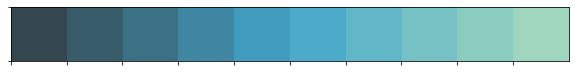

In [77]:
sns.palplot(sns.color_palette("GnBu_d",10))
sns.set_palette(sns.color_palette("GnBu_d",10))

In [78]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

#### Reading the Data

In [79]:
df = pd.read_csv("Collisions.csv", low_memory=False, parse_dates=["INCDATE"])
df_original = df.copy()
df.head()

X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS  \
0 -122.392900  47.648646  1         332176  333676     EA40602  Matched     
1 -122.284487  47.603308  2         328504  330004     EA10294  Unmatched   
2 -122.338480  47.619118  3         329091  330591     EA15604  Matched     
3 -122.358307  47.653110  4         328274  329774     EA07215  Matched     
4 -122.296519  47.733786  5         329003  330503     E986969  Matched     

       ADDRTYPE   INTKEY  \
0  Intersection  26581.0   
1  Block        NaN        
2  Block        NaN        
3  Block        NaN        
4  Intersection  35990.0   

                                                   LOCATION EXCEPTRSNCODE  \
0  28TH AVE W AND W DRAVUS ST                                               
1  LAKE WASHINGTON BLVD BETWEEN LAKESIDE AVE AND E ALDER ST  NEI            
2  WESTLAKE AVE N BETWEEN DENNY WAY AND JOHN ST                             
3  NW 36TH ST BETWEEN 1ST AVE NW AND LEARY WAY NW                           
4  30TH AVE NE AND NE 145TH ST                                              

                                                  EXCEPTRSNDESC SEVERITYCODE  \
0  NaN                                                           2             
1  Not Enough Information, or Insufficient Location Information  0             
2  NaN                                                           1             
3  NaN                                                           1             
4  NaN                                                           2             

                     SEVERITYDESC COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  \
0  Injury Collision                Rear Ended    2            0          
1  Unknown                         NaN           0            0          
2  Property Damage Only Collision  Sideswipe     2            0          
3  Property Damage Only Collision  Parked Car    4            0          
4  Injury Collision                Angles        2            0          

   PEDCYLCOUNT  VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES  \
0  0            2         1         0                0            
1  0            0         0         0                0            
2  0            2         0         0                0            
3  0            4         0         0                0            
4  0            2         1         0                0            

                    INCDATE                INCDTTM  \
0 2020-06-09 00:00:00+00:00  06-09-2020 12:48        
1 2020-02-02 00:00:00+00:00  02-02-2020              
2 2020-02-12 00:00:00+00:00  02-12-2020 08:00        
3 2020-01-23 00:00:00+00:00  1/23/2020 10:33:00 PM   
4 2019-11-26 00:00:00+00:00  11/26/2019 8:26:00 AM   

                              JUNCTIONTYPE  SDOT_COLCODE  \
0  At Intersection (intersection related)   14.0           
1  NaN                                      0.0            
2  Mid-Block (not related to intersection)  14.0           
3  Mid-Block (not related to intersection)  14.0           
4  At Intersection (intersection related)   11.0           

                                             SDOT_COLDESC INATTENTIONIND  \
0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
1  NOT ENOUGH INFORMATION / NOT APPLICABLE                 NaN             
2  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
3  MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END            NaN             
4  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE  Y               

  UNDERINFL   WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT  \
0  N         Overcast  Dry      Daylight                 NaN            
1  NaN       NaN       NaN      NaN                      NaN            
2  N         Clear     Dry      Daylight                 NaN            
3  N         Raining   Wet      Dark - Street Lights On  NaN            
4  N         Clear     Dry      Daylight                 NaN            

   SDO

In [80]:
df.shape

(220937, 40)

The dataset consists of 40 distinct columns and 220937 rows

```OBJECTID``` is just a unique value for each row. 
```INCKEY``` and ```COLDETKEY``` are unique identifier for a given incident

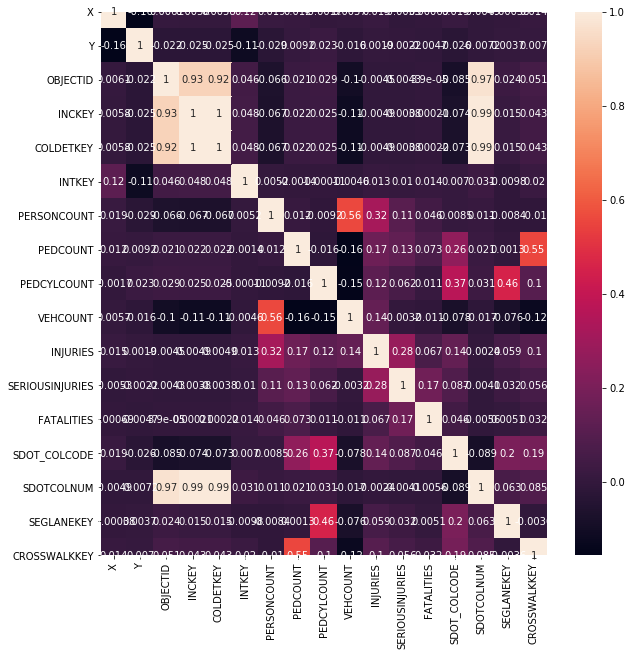

In [81]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

## Data Cleaning

In [82]:
df.drop(["INCKEY","COLDETKEY"],axis=1,inplace=True)

In [83]:
df["UNDERINFL"].unique()

array(['N', nan, 'Y', '0', '1'], dtype=object)

For the column ```UNDERINFL``` there are 4 unique values. Intuitively, it seems that 'Y' and '1' denotes the same thing which is the person was under influence of alcohol. Same is with 'N' and '0'. Hence, let's save the column values in systematic format

In [84]:
def for_UNDERINFL(x):
    if x in ['Y','1']:
        return "Y"
    elif x in ['N','0']:
        return "N"
    else:
        return x
    
df["UNDERINFL"] = df["UNDERINFL"].apply(for_UNDERINFL)

In [85]:
temp = df[["SEVERITYCODE","SEVERITYDESC"]]
temp[~(temp.duplicated())].style.hide_index()

There are 5 categories of severity. It is safe to assume that the missing ```SEVERITYCODE``` must belong to unknown category i.e. Category 0.

In [86]:
df["SEVERITYCODE"].fillna('0', inplace=True)

In [87]:
df["ADDRTYPE"].fillna('Not Mentioned', inplace=True)

In [88]:
df["MONTH"] = df["INCDATE"].dt.month
df["YEAR"] = df["INCDATE"].dt.year

## Analysis

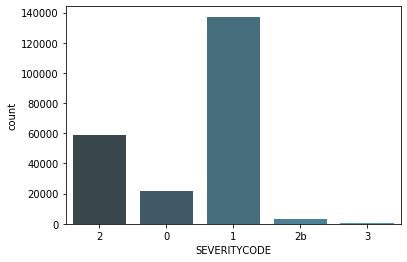

In [89]:
sns.countplot(df["SEVERITYCODE"])

In [90]:
df["SEVERITYCODE"].value_counts(normalize=True)*100

1     62.143054
2     26.526566
0     9.773827 
2b    1.398589 
3     0.157964 
Name: SEVERITYCODE, dtype: float64

We can see that 62% of accidents belong to Category 1 which is "Property Damage Only Collision" <br>
26% belong to Category 2, "Injury Collision"

### Accidents declining YoY? Not so sure

Text(0.5, 1.0, 'Collision count YoY')

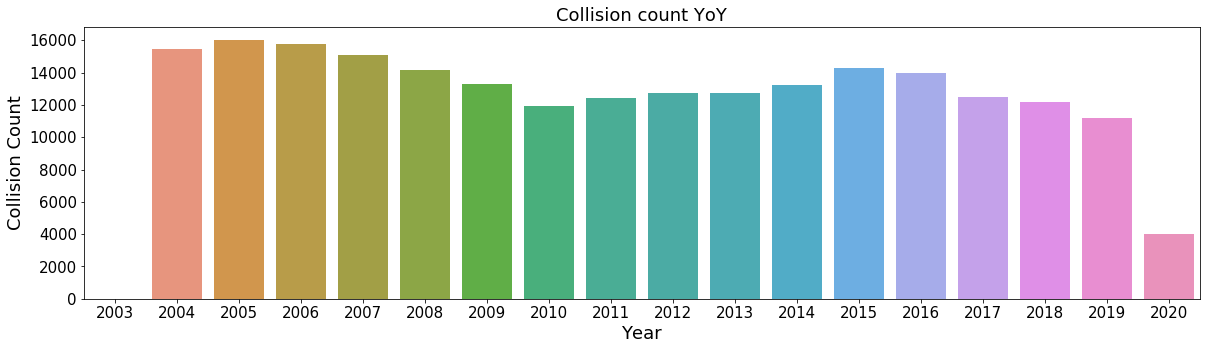

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["INCDATE"].dt.year,ax=ax)
ax.set_xlabel('Year', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count YoY", fontsize=18)
# plt.savefig('./blog/1.png')

Accidents are seems to be in declining yearly, but we need some more data to state this precisely. 

### Month wise collision rate

Text(0.5, 1.0, 'Collision count MoM')

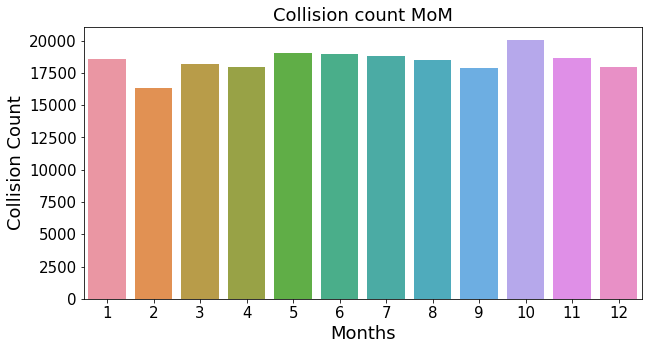

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["INCDATE"].dt.month,ax=ax)
ax.set_xlabel('Months', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count MoM", fontsize=18)
# plt.savefig('./blog/2.png')

There is no clear trend in number of collisions and month of the year

In [19]:
df["INCTIME"] = pd.to_datetime(df["INCDTTM"])
for idx, dt in enumerate(df["INCDTTM"]):
    if ':' not in dt:
        df["INCTIME"][idx] = np.nan

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df["TIMEOFDAY"] = pd.cut(df["INCTIME"].dt.hour, bins=b, labels=l, include_lowest=True)

D:\Softwares\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
1 - (df["TIMEOFDAY"].isnull().sum() / len(df))

0.7631723070377529

We have time of accident for ~76% of data. In order to analyse timewise, splitting the data into 6 categories viz.  'Late Night', 'Early Morning', 'Morning', 'Noon', 'Eve', 'Night'

In [21]:
pd.DataFrame({'TIME' : ['00:00 to 04:00', '04:00 to 08:00', '08:00 to 12:00', '12:00 to 16:00', '16:00 to 20:00', '20:00 to 00:00']},
             index=['Late Night', 'Early Morning','Morning','Noon','Eve','Night'])

TIME
Late Night     00:00 to 04:00
Early Morning  04:00 to 08:00
Morning        08:00 to 12:00
Noon           12:00 to 16:00
Eve            16:00 to 20:00
Night          20:00 to 00:00

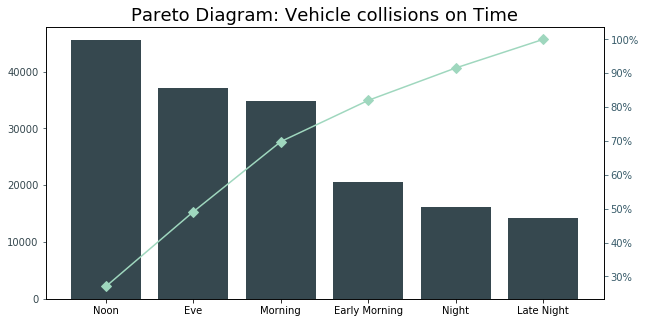

In [22]:
df_TOD = pd.DataFrame(df['OBJECTID'].groupby(df['TIMEOFDAY'].astype('object')).count())
df_TOD = df_TOD.sort_values(by='OBJECTID',ascending=False)
df_TOD["cumpercentage"] = df_TOD["OBJECTID"].cumsum()/df_TOD["OBJECTID"].sum()*100


fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()
ax.bar(df_TOD.index, df_TOD["OBJECTID"])
ax2.plot(df_TOD.index, df_TOD["cumpercentage"], color="C9", marker="D", ms=7)
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.title("Pareto Diagram: Vehicle collisions on Time", fontsize=18)

# plt.savefig('./blog/4.png')
plt.show()

From the pareto diagram, we can see that about 50% of accidents tend to happen during the day time i.e. between 12:00 P.M. to 8:00 P.M.

In [23]:
pd.DataFrame(df['OBJECTID'].groupby(df['TIMEOFDAY']).count())

OBJECTID
TIMEOFDAY              
Late Night     14237   
Early Morning  20519   
Morning        34919   
Noon           45599   
Eve            37215   
Night          16124

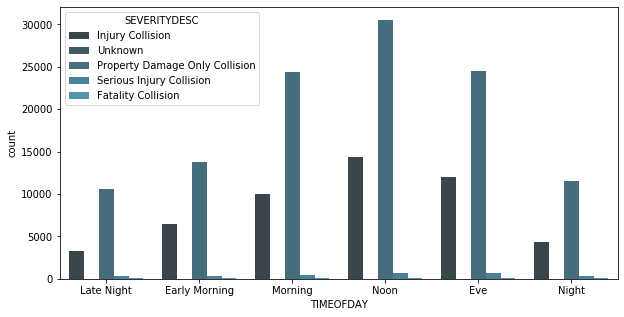

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["TIMEOFDAY"], hue=df['SEVERITYDESC'],ax=ax)

In [25]:
pd.crosstab(df.TIMEOFDAY, df.SEVERITYCODE)

SEVERITYCODE   0      1      2   2b   3
TIMEOFDAY                              
Late Night     0  10639  3232   314  52
Early Morning  1  13748  6407   326  37
Morning        4  24403  10039  432  41
Noon           1  30534  14354  647  63
Eve            0  24509  11998  650  58
Night          0  11500  4295   288  41

D:\Softwares\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002596A076AC8>,
      dtype=object)

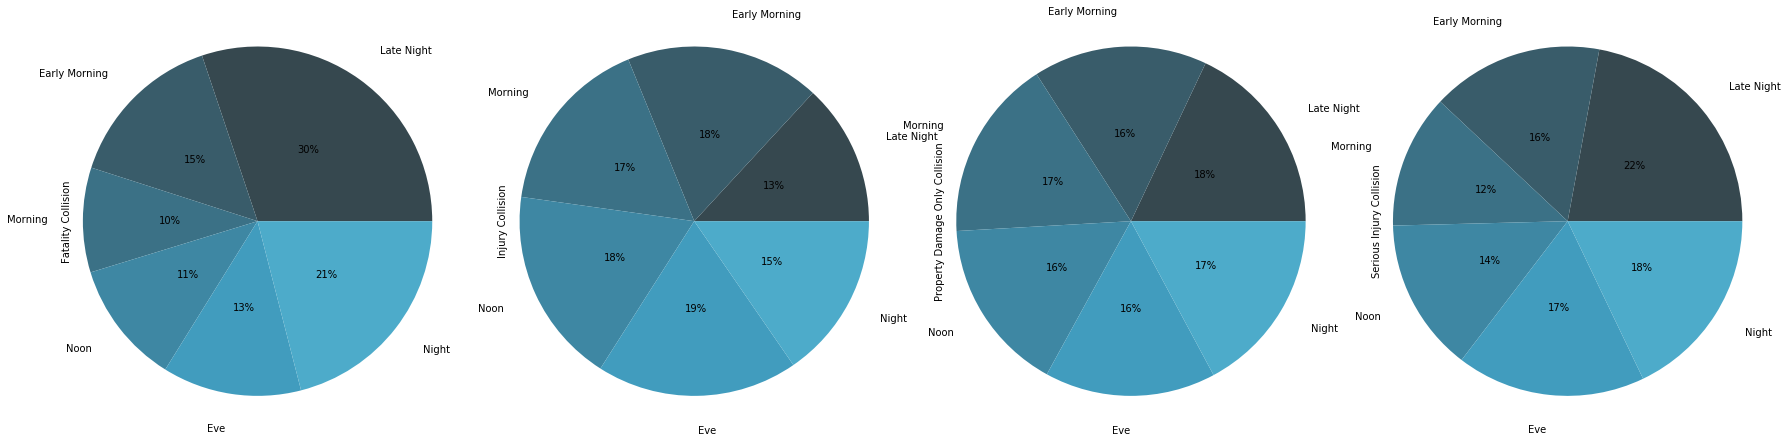

In [26]:
fig, ax = plt.subplots(figsize=(30,20))
df_temp = df.copy()
df_temp = df_temp[df_temp["SEVERITYCODE"]!='0']
(pd.crosstab(df_temp.TIMEOFDAY, df_temp.SEVERITYDESC).apply(lambda r: r/r.sum(), axis=1)*100).plot.pie(subplots=True, ax=ax, autopct='%1.0f%%', pctdistance=0.5,labeldistance=1.2, radius=1.2, legend=None)
# plt.savefig('./blog/5.png')

There is no clear relation between severity of accidents and time of the day. During Late Night, cases of severity 1 ("Property damage only collision") incidents are higher than rest of the day percentage wise.<br>
3 of 4 accidents happening during late night are just doing property damage

In [27]:
(pd.crosstab(df.TIMEOFDAY, df.SEVERITYDESC).apply(lambda r: r/r.sum(), axis=1)*100)

SEVERITYDESC   Fatality Collision  Injury Collision  \
TIMEOFDAY                                             
Late Night     0.365245            22.701412          
Early Morning  0.180321            31.224719          
Morning        0.117415            28.749391          
Noon           0.138161            31.478760          
Eve            0.155851            32.239688          
Night          0.254279            26.637311          

SEVERITYDESC   Property Damage Only Collision  Serious Injury Collision  \
TIMEOFDAY                                                                 
Late Night     74.727822                       2.205521                   
Early Morning  67.001316                       1.588771                   
Morning        69.884590                       1.237149                   
Noon           66.961995                       1.418891                   
Eve            65.857853                       1.746608                   
Night          71.322253                       1.786157                   

SEVERITYDESC    Unknown  
TIMEOFDAY                
Late Night     0.000000  
Early Morning  0.004874  
Morning        0.011455  
Noon           0.002193  
Eve            0.000000  
Night          0.000000

## Speeding

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025965717608>],
      dtype=object)

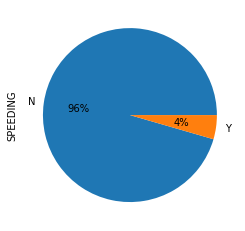

In [28]:
sns.set_palette(sns.color_palette("tab10",10))
speed = df["SPEEDING"]
speed = speed.fillna("N")
speed.value_counts(normalize=True).plot.pie(subplots=True, autopct='%1.0f%%')
# plt.savefig('./blog/6.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025965758148>],
      dtype=object)

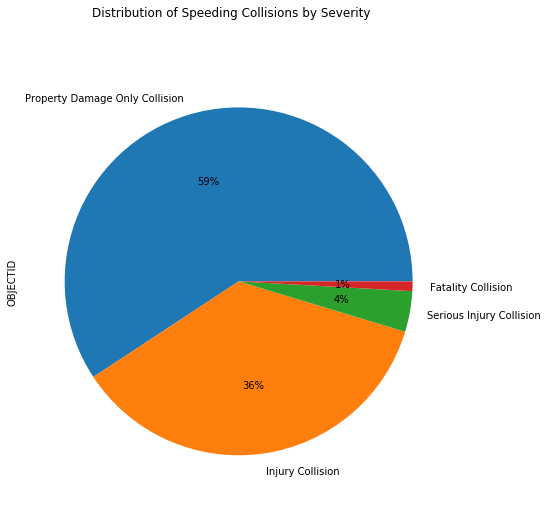

In [29]:
((df[df["SPEEDING"]=="Y"].groupby("SEVERITYDESC")["OBJECTID"].count().sort_values(ascending=False) / df[df["SPEEDING"]=="Y"].groupby("SEVERITYCODE")["OBJECTID"].count().sum())*100).plot.pie(subplots=True,figsize=(8,8), autopct='%1.0f%%' , title="Distribution of Speeding Collisions by Severity")
# plt.savefig('./blog/7.png')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000259657B1A48>],
      dtype=object)

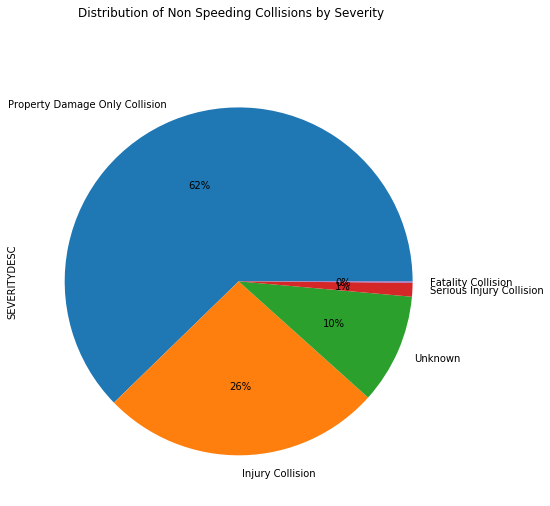

In [30]:
(df[df["SPEEDING"].isnull()]["SEVERITYDESC"].value_counts(normalize=True)*100).plot.pie(subplots=True,figsize=(8,8), autopct='%1.0f%%', title="Distribution of Non Speeding Collisions by Severity")
# plt.savefig('./blog/8.png')

We can see percentage of <br>
Injury Collision <b>increases</b> from 26.52% to 36.3% <br>
Serious Injury Collision <b>increases</b> from 1.39% to 3.92%  and<br>
Fatality Collision <b>increases</b> from 0.15% to 0.89%  <br>
because of speeding. While the percentage of Property Damage Only Collision <b>decreases</b> from 62.14% to 58.87%

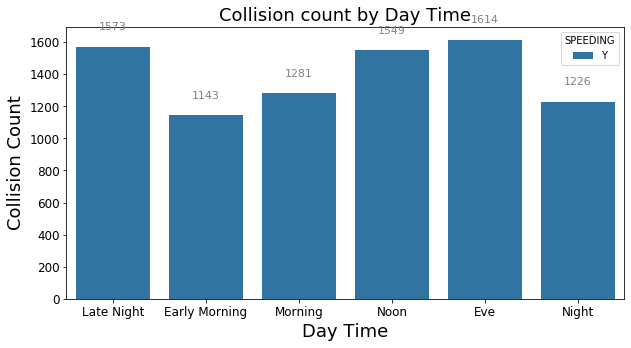

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["TIMEOFDAY"], hue=df['SPEEDING'],ax=ax)
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count by Day Time", fontsize=18)
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
# plt.savefig('./blog/9.png')

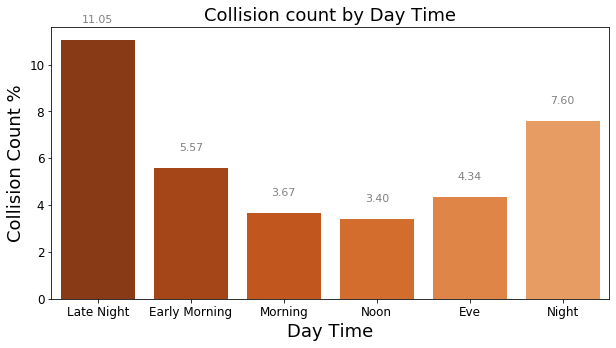

In [32]:
sns.set_palette(sns.color_palette("Oranges_r",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=(df.groupby('TIMEOFDAY')['SPEEDING'].apply(lambda x: x[x == 'Y'].count()) /df.groupby('TIMEOFDAY')['OBJECTID'].count())*100, x=list(df.groupby('TIMEOFDAY').groups.keys()),ax=ax)
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("Collision count by Day Time", fontsize=18)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
# plt.savefig('./blog/10.png')

11% of all cases in late night are due to speeding

Text(0.5, 1.0, 'Collision type by count of Speeding collisions')

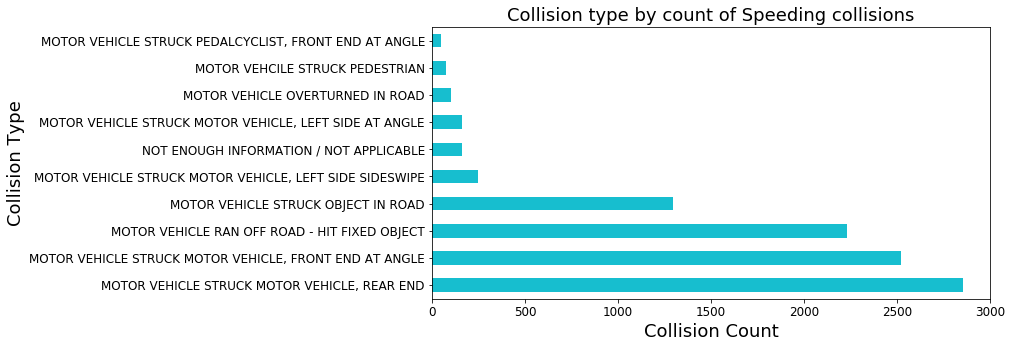

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette(sns.color_palette("tab10_r",10))
df[(df["SPEEDING"]=="Y")].groupby("SDOT_COLDESC")["OBJECTID"].count().sort_values(ascending=False).head(10).plot.barh(ax=ax)
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Type', fontsize=18)
plt.title("Collision type by count of Speeding collisions", fontsize=18)
# plt.savefig('./blog/11.png')

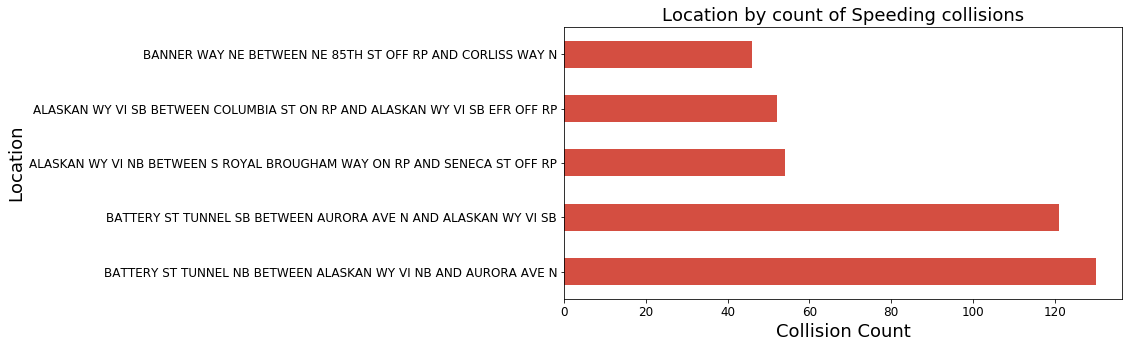

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette(sns.color_palette("coolwarm_r",10))
df[df["SPEEDING"]=="Y"].groupby("LOCATION")["OBJECTID"].count().sort_values(ascending=False).head(5).plot.barh() 
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Location', fontsize=18)
plt.title("Location by count of Speeding collisions", fontsize=18)
plt.savefig('./blog/12.png')

There are over 250 cases of collisions at "BATTERY ST TUNNEL"

In [35]:
m = folium.Map(location=[df["Y"].mean(), df["X"].mean()], zoom_start=12)
folium.Marker((47.69034175,-122.3290808),popup="MOST SPEEDING COLLISIONS: BATTERY ST TUNNEL").add_to(m)    
m

<img src="https://bridgehunter.com/photos/19/72/197274-M.jpg"> </img>

Battery Tunnel, Seattle. (img source: https://bridgehunter.com/photos/19/72/197274-M.jpg)

## Collisions due to inattention

Text(0.5, 1.0, 'Collision count by Day time for Inattentive driving collisions')

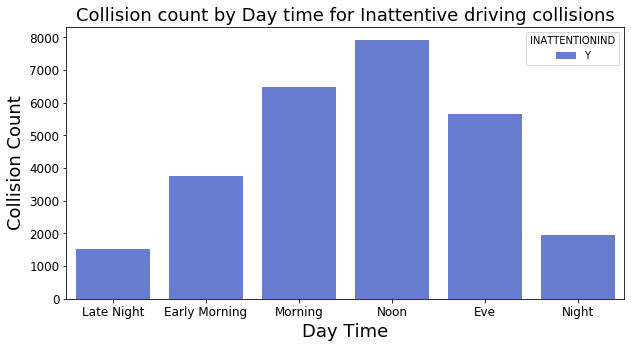

In [36]:
sns.set_palette(sns.color_palette("coolwarm",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df["TIMEOFDAY"], hue=df['INATTENTIONIND'],ax=ax)
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count by Day time for Inattentive driving collisions", fontsize=18)
# plt.savefig('./blog/14.png')

Text(0.5, 1.0, '% of Collision count by Day time for Inattentive driving collisions')

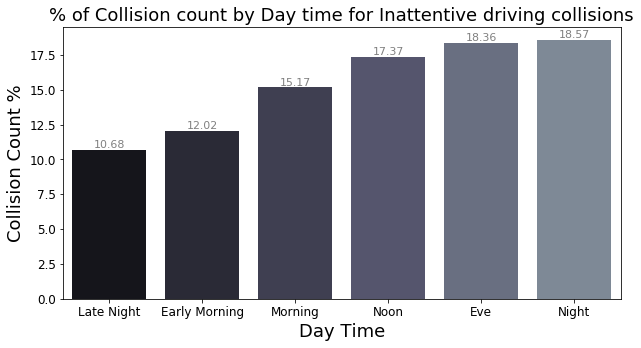

In [37]:
sns.set_palette(sns.color_palette("bone",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=((df.groupby('TIMEOFDAY')['INATTENTIONIND'].apply(lambda x: x[x == 'Y'].count()) /df.groupby('TIMEOFDAY')['OBJECTID'].count())*100).sort_values(), x=list(df.groupby('TIMEOFDAY').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("% of Collision count by Day time for Inattentive driving collisions", fontsize=18)
# plt.savefig('./blog/15.png')

~18% of collisions happening in morning and early morning are due to inattention of drivers

Text(0.5, 1.0, 'Collision type by count for Inattentive driving collisions')

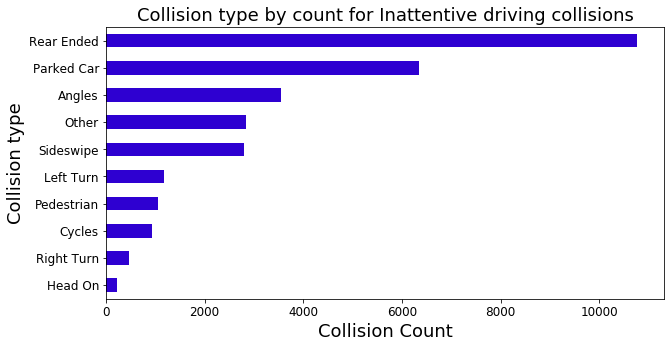

In [38]:
sns.set_palette(sns.color_palette("brg",10))
fig, ax = plt.subplots(figsize=(10,5))
(df[df["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["OBJECTID"].count().sort_values()).plot.barh()
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision type', fontsize=18)
plt.title("Collision type by count for Inattentive driving collisions", fontsize=18)
# plt.savefig('./blog/16.png')

In [39]:
(df[df["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["OBJECTID"].count().sort_values(ascending=False))[0]/(df[df["INATTENTIONIND"]=="Y"].groupby("COLLISIONTYPE")["OBJECTID"].count().sum()) * 100

35.685417080765916

We noticed that 35% of collisions happening because of inattention are rear ended collisions.

## Under influence of alcohol or drugs

Text(0.5, 1.0, 'Collision count by Day time for under influenced driving collisions')

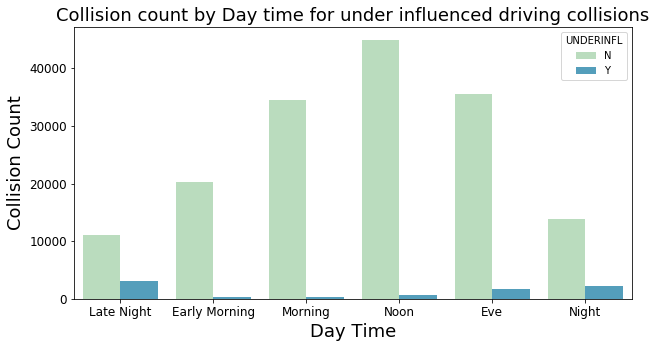

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set_palette(sns.color_palette("GnBu",2))
sns.countplot(df["TIMEOFDAY"], hue=df['UNDERINFL'],ax=ax)
ax.set_xlabel('Day Time', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count by Day time for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/17.png')

In [41]:
pd.crosstab(df.TIMEOFDAY, df.UNDERINFL).apply(lambda x: (x/x.sum())*100, axis=0)

UNDERINFL              N          Y
TIMEOFDAY                          
Late Night     6.956093   36.961722
Early Morning  12.595477  4.007177 
Morning        21.563452  4.306220 
Noon           28.024687  8.241627 
Eve            22.186236  19.880383
Night          8.674055   26.602871

Of total alcoholic and drug cases, ~64% cases happen during Night and Late Night

Text(0.5, 1.0, 'Collision count by Month for under influenced driving collisions')

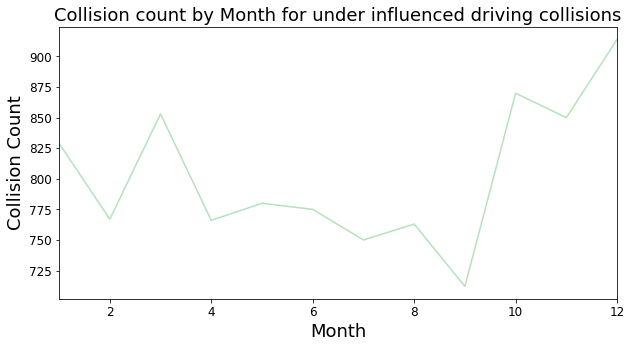

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
df[df["UNDERINFL"]=="Y"].groupby("MONTH")["OBJECTID"].count().plot(ax=ax)
ax.set_xlabel('Month', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count by Month for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/19.png')

We can see there are relatively more cases of alcoholic and drug influenced collision during December (Probably because of holiday season)

Text(0.5, 1.0, 'Location by Collision count for under influenced driving collisions')

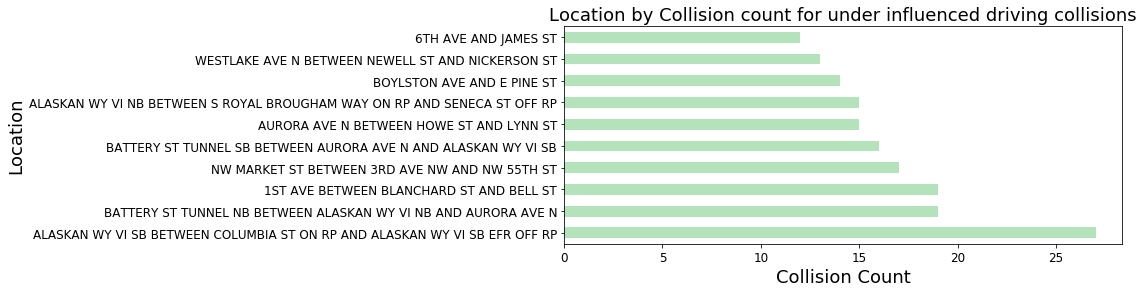

In [43]:
fig, ax = plt.subplots(figsize=(10,4))
df[df["UNDERINFL"]=="Y"].groupby("LOCATION")["OBJECTID"].count().sort_values(ascending=False).head(10).plot.barh(ax=ax)
ax.set_xlabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Location', fontsize=18)
plt.title("Location by Collision count for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/20.png')

"ALASKAN VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP" has greatest number of cases of underinfluence collisions

## Examining collision type

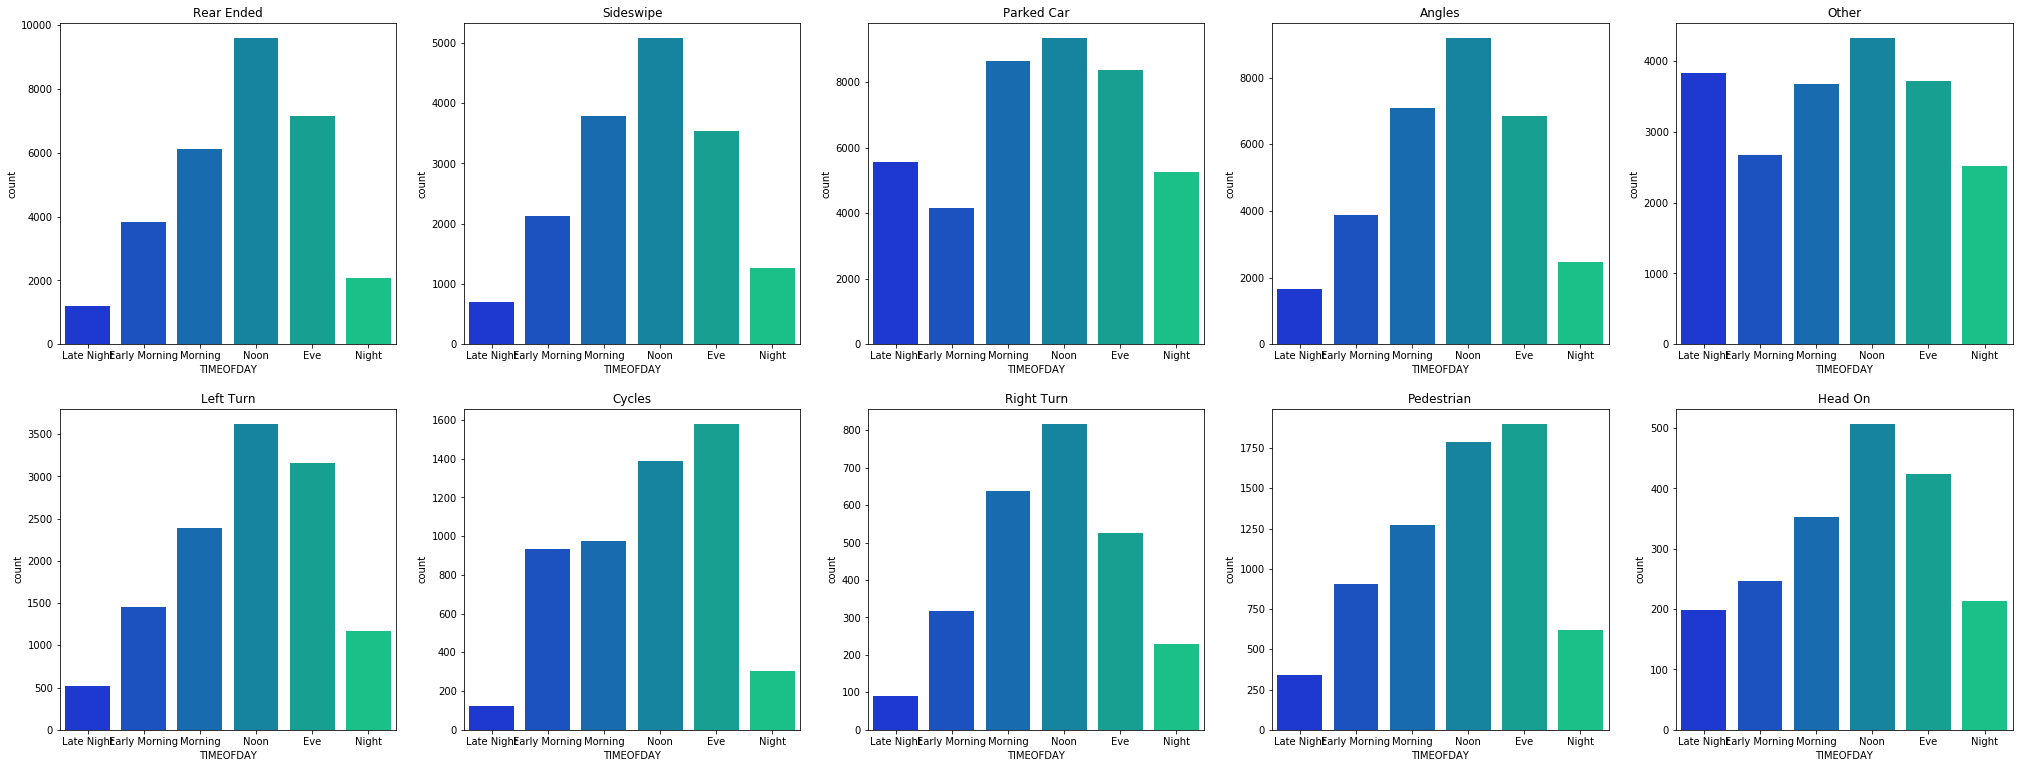

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(35,13))
sns.set_palette(sns.color_palette("winter"))
col_type = list(df['COLLISIONTYPE'].unique())
(col_type).remove(np.nan)

for i in range(0,2):
    for j in range(0,5):
        sns.countplot(df[df['COLLISIONTYPE'] == col_type[0]]['TIMEOFDAY'], ax=ax[i,j])
        ax[i,j].set_title(col_type[0])
        col_type.pop(0)
# plt.savefig('./blog/21.png')

In [45]:
pd.crosstab(df.COLLISIONTYPE, df.TIMEOFDAY).apply(lambda r: (r/r.sum())*100, axis=0)

TIMEOFDAY      Late Night  Early Morning    Morning       Noon        Eve  \
COLLISIONTYPE                                                               
Angles         11.694880   18.938286      20.287032  20.135553  18.432226   
Cycles         0.877994    4.543239       2.792976   3.040074   4.245942    
Head On        1.397766    1.204056       1.011201   1.112062   1.139417    
Left Turn      3.610311    7.087842       6.854966   7.946744   8.502634    
Other          26.873639   13.030126      10.530236  9.471168   9.977964    
Parked Car     39.060195   20.249586      24.712825  20.460179  22.468559   
Pedestrian     2.395168    4.421371       3.646624   3.917440   5.105880    
Rear Ended     8.470886    18.636053      17.514108  20.997565  19.200795   
Right Turn     0.632156    1.550161       1.824744   1.792020   1.410835    
Sideswipe      4.987006    10.339280      10.825289  11.127196  9.515748    

TIMEOFDAY          Night  
COLLISIONTYPE             
Angles         15.387955  
Cycles         1.891707   
Head On        1.327296   
Left Turn      7.225702   
Other          15.592632  
Parked Car     32.531167  
Pedestrian     3.857843   
Rear Ended     12.882218  
Right Turn     1.420331   
Sideswipe      7.883148

People are morelikely to hit Parked car during Night. We can also see there are alot of "Other" collision type of cases in late night.

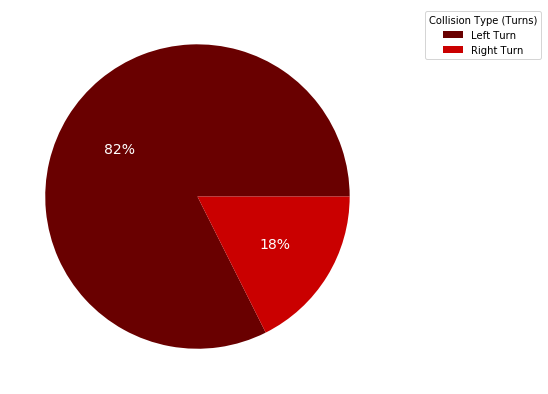

In [46]:
sns.set_palette(sns.color_palette("hot"))
tempdf = df[(df["COLLISIONTYPE"]=="Left Turn")|(df["COLLISIONTYPE"]=="Right Turn")]
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(tempdf["COLLISIONTYPE"].value_counts(), textprops={'color':"white", 'fontsize': 14}, autopct='%1.0f%%')

ax.legend(tempdf["COLLISIONTYPE"],
          title="Collision Type (Turns)",
          loc="upper center",
          bbox_to_anchor=(1, 0, 0.5, 1))
# plt.savefig('./blog/24.png')
plt.show()


In [47]:
((df[df["COLLISIONTYPE"]=="Left Turn"]["OBJECTID"].count() - df[df["COLLISIONTYPE"]=="Right Turn"]["OBJECTID"].count()) / df[(df["COLLISIONTYPE"]=="Right Turn")|(df["COLLISIONTYPE"]=="Left Turn")]["OBJECTID"].count()) * 100

64.802997482583

There is ~65% more chance to encounter a collision while taking a Left turn than taking a Right turn

In [48]:
df[df["COLLISIONTYPE"]=="Left Turn"].groupby("ADDRTYPE")["OBJECTID"].count()

ADDRTYPE
Block            2167 
Intersection     11878
Not Mentioned    30   
Name: OBJECTID, dtype: int64

In [49]:
df[df["COLLISIONTYPE"]=="Right Turn"].groupby("ADDRTYPE")["OBJECTID"].count()

ADDRTYPE
Block            1255
Intersection     1735
Not Mentioned    16  
Name: OBJECTID, dtype: int64

In [50]:
sns.set_palette(sns.color_palette("Paired"))
x = pd.DataFrame(df[(df["COLLISIONTYPE"]=='Other')&(df["TIMEOFDAY"]=='Late Night')].groupby('SDOT_COLDESC')['OBJECTID'].count()).sort_values(by='OBJECTID', ascending=False)

In [51]:
others_values = x["OBJECTID"].tail(12).sum()
x.drop(x.tail(12).index,inplace=True)
x = x.append(pd.DataFrame(data={"OBJECTID":others_values}, index=["Others Remaining"]))

D:\Softwares\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
D:\Softwares\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


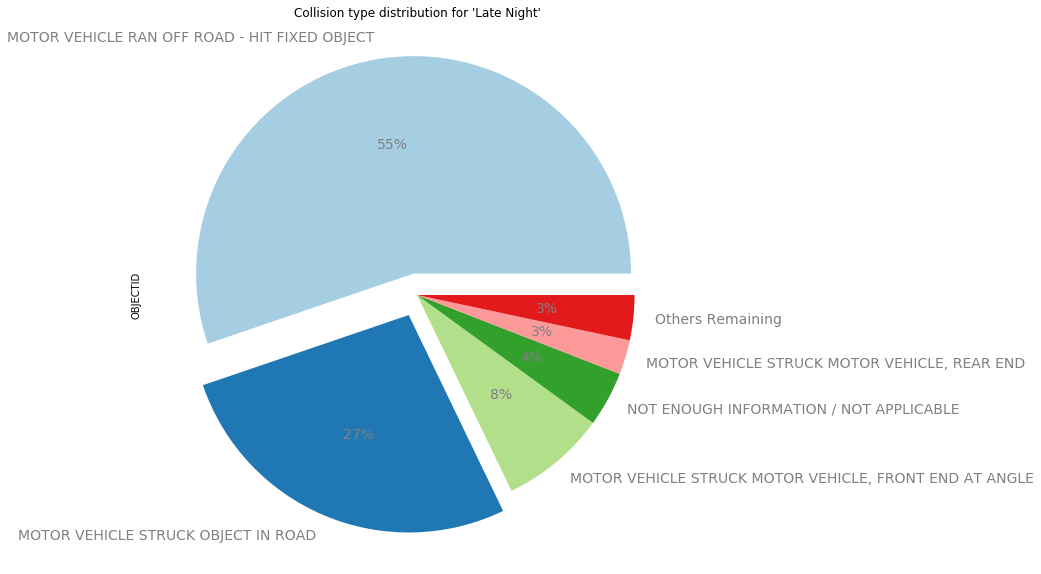

In [52]:
x.plot(kind='pie',subplots=True,figsize=(10,10), autopct='%1.0f%%',textprops={'color':"grey", 'fontsize': 14}, explode=(0.1,0.1,0,0,0,0))
plt.axes().set_facecolor("white")
plt.axes().get_legend().remove()
plt.title("Collision type distribution for 'Late Night'")
# plt.savefig('./blog/25.png')
plt.show()

Motor Vehicles tend to hit fixed objects more during late night time

## Collision Type

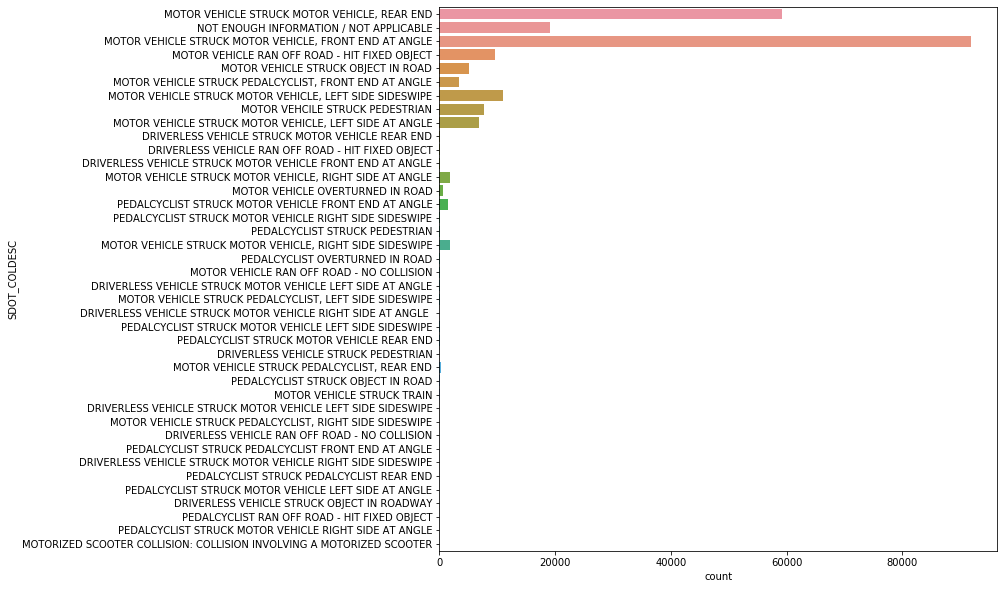

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y=df['SDOT_COLDESC'],ax=ax,orient="h")

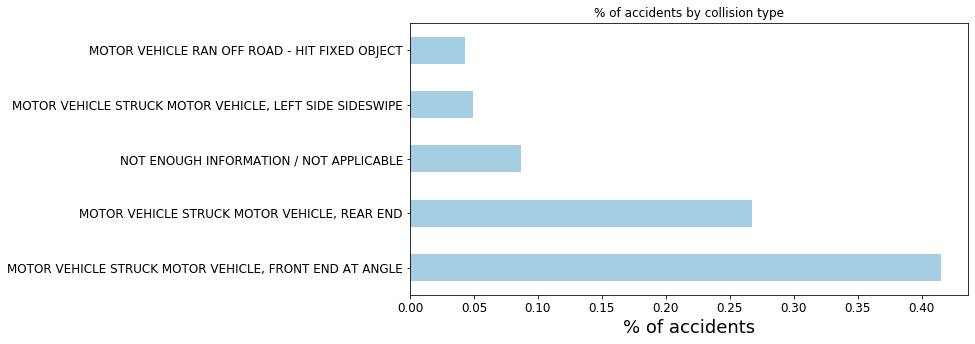

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
df['SDOT_COLDESC'].value_counts(normalize=True).head(5).plot.barh(title="% of accidents by collision type",ax=ax)
ax.set_xlabel('% of accidents', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
# ax.set_ylabel('Collision Count', fontsize=18)
# plt.title("Collision count by Month for under influenced driving collisions", fontsize=18)
# plt.savefig('./blog/26.png')


We can see ~40% of collisions are of motor vehicle striking another motor vehicle’s front end at an angle.


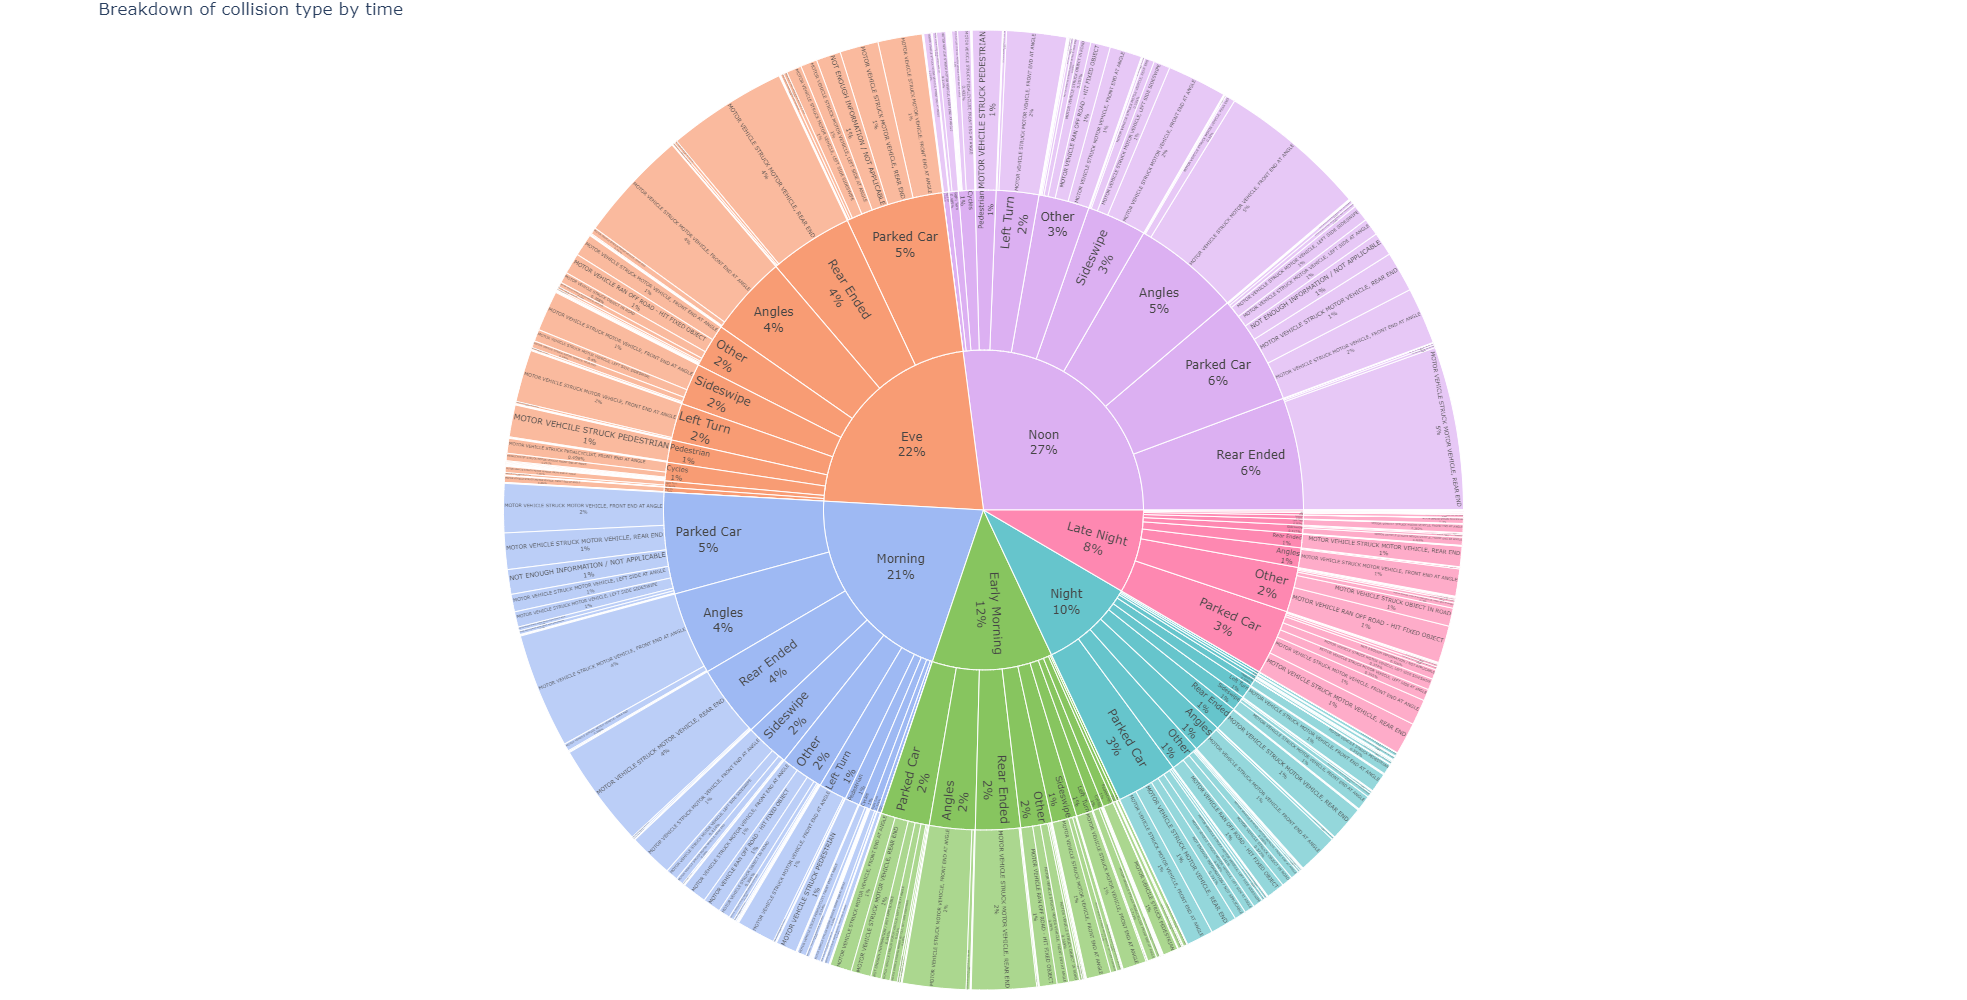

In [55]:
df1 = df.copy()

df1["COLLISIONTYPE"].fillna("Unknown",inplace=True)
df1["SDOT_COLDESC"].fillna("Unknown",inplace=True)
fig = px.sunburst(
    data_frame=df1[~df1["TIMEOFDAY"].isnull()],
    path= ["TIMEOFDAY",'COLLISIONTYPE',"SDOT_COLDESC"], 
    color="TIMEOFDAY",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth=-1,                        
    branchvalues="total", 
    title="Breakdown of collision type by time",
)
fig.update_traces(textinfo='label+percent entry') # percent parent
fig.update_layout(margin=dict(t=30, b=10, r=10, l=10),
                  width=1000, height=1000)
fig.show()

In [56]:
pd.crosstab(df.COLLISIONTYPE, df.TIMEOFDAY).apply(lambda r: ((r/r.sum())*100).round(2), axis=1)

TIMEOFDAY      Late Night  Early Morning  Morning   Noon    Eve  Night
COLLISIONTYPE                                                         
Angles         5.34        12.47          22.73    29.47  22.02  7.96 
Cycles         2.36        17.57          18.39    26.14  29.79  5.75 
Head On        10.24       12.71          18.16    26.08  21.81  11.01
Left Turn      4.17        11.81          19.43    29.42  25.70  9.46 
Other          18.47       12.90          17.74    20.84  17.92  12.13
Parked Car     13.47       10.06          20.90    22.60  20.26  12.71
Pedestrian     4.99        13.28          18.64    26.15  27.82  9.11 
Rear Ended     4.03        12.77          20.42    31.98  23.87  6.94 
Right Turn     3.44        12.16          24.35    31.23  20.07  8.75 
Sideswipe      4.30        12.86          22.91    30.75  21.47  7.71

## Location wise analysis

In [57]:
f_df = df.groupby('ADDRTYPE')[['FATALITIES']].sum()
f_df['INJURIES'] = df.groupby('ADDRTYPE')[['INJURIES']].sum()
f_df['SERIOUSINJURIES'] = df.groupby('ADDRTYPE')[['SERIOUSINJURIES']].sum()
f_df['ACDNTCOUNT'] = df.groupby('ADDRTYPE')[['OBJECTID']].count()
f_df = f_df.reset_index()
f_df

ADDRTYPE  FATALITIES  INJURIES  SERIOUSINJURIES  ACDNTCOUNT
0  Alley          0           96        5                872       
1  Block          212         42580     1687             144661    
2  Intersection   160         39680     1656             71693     
3  Not Mentioned  0           239       3                3711

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

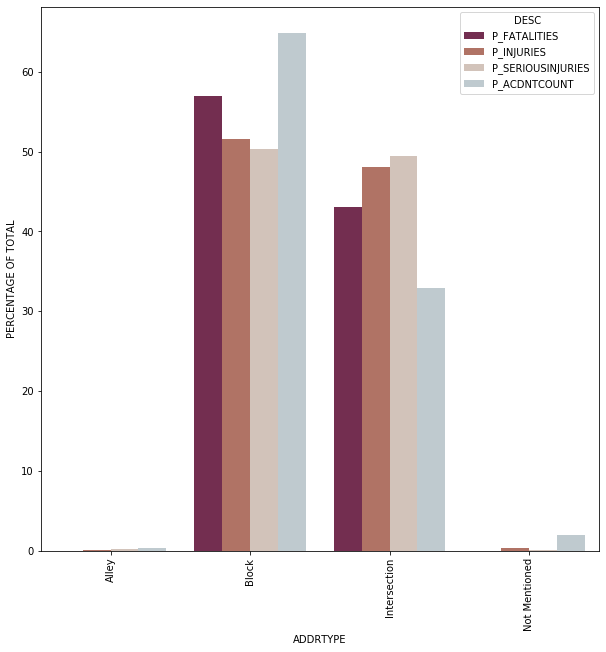

In [58]:
sns.set_palette('twilight_shifted_r')
a = df.groupby('ADDRTYPE')[['FATALITIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_INJURIES'] = df.groupby('ADDRTYPE')[['INJURIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_SERIOUSINJURIES'] = df.groupby('ADDRTYPE')[['SERIOUSINJURIES']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
a['P_ACDNTCOUNT'] = df.groupby('ADDRTYPE')[['OBJECTID']].sum()
f_df1 = a.apply(lambda x : 100 * x/float(x.sum()))
#f_df1 = f_df1.drop(columns=['FATALITIES', 'INJURIES'])
f_df1.reset_index(inplace=True)
f_df1.rename(columns={'FATALITIES':'P_FATALITIES'}, inplace=True)
f_df1

fig, ax = plt.subplots(figsize=(10,10))
df2=pd.melt(f_df1,id_vars=['ADDRTYPE'],var_name='DESC', value_name='PERCENTAGE OF TOTAL')
df2
sns.barplot(x='ADDRTYPE', y='PERCENTAGE OF TOTAL', hue='DESC', data=df2, ax=ax)
plt.xticks(rotation=90)
# plt.savefig('./blog/29.png')

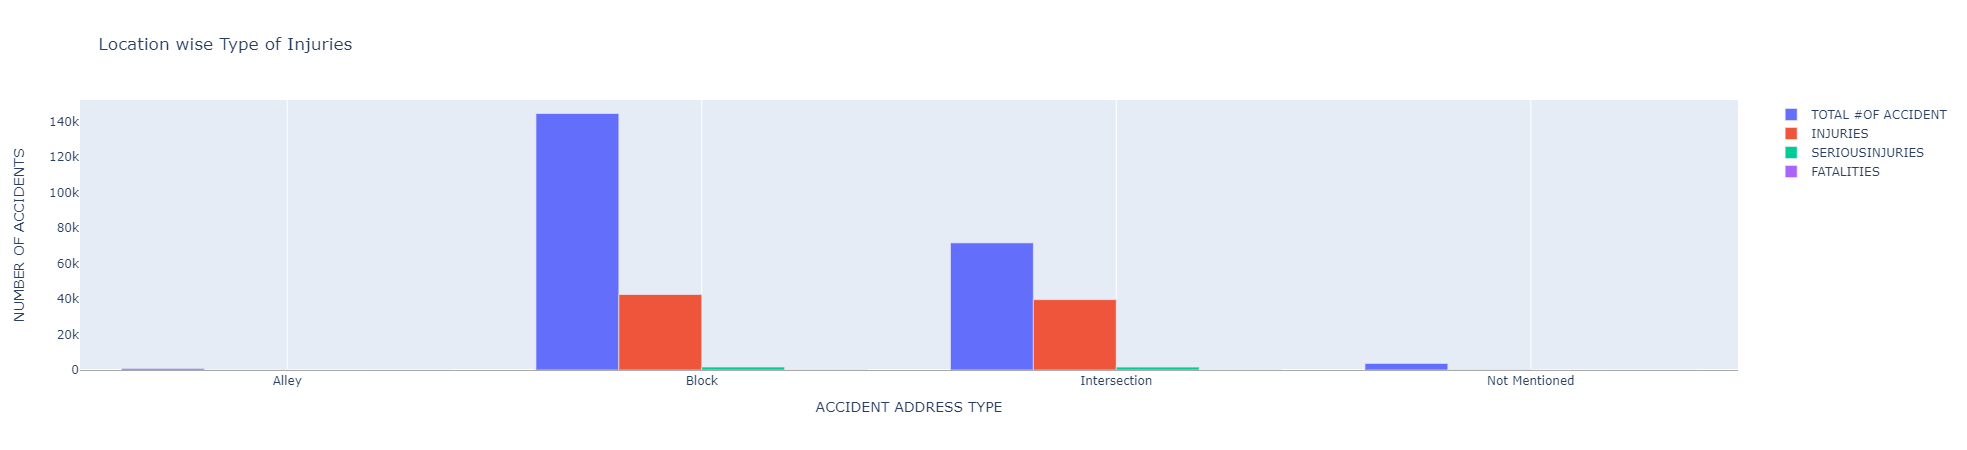

In [59]:
layout = go.Layout(
    title="Location wise Type of Injuries",
    xaxis=dict(
        title="ACCIDENT ADDRESS TYPE",
        linecolor='#A9A9A9',
        showgrid=True),
    yaxis=dict(
        title="NUMBER OF ACCIDENTS",
        showgrid=False),
    barmode='group'
)

fig = go.Figure(data=[
    go.Bar(name='TOTAL #OF ACCIDENT', x=f_df['ADDRTYPE'], y=f_df['ACDNTCOUNT']),
    go.Bar(name='INJURIES', x=f_df['ADDRTYPE'], y=f_df['INJURIES']),
    go.Bar(name='SERIOUSINJURIES', x=f_df['ADDRTYPE'], y=f_df['SERIOUSINJURIES']),
    go.Bar(name='FATALITIES', x=f_df['ADDRTYPE'], y=f_df['FATALITIES'])
    
], layout= layout)
fig.show()

In [60]:
pd.crosstab(df["COLLISIONTYPE"],df["ADDRTYPE"])

ADDRTYPE       Alley  Block  Intersection  Not Mentioned
COLLISIONTYPE                                           
Angles         58     5771   29545         66           
Cycles         8      2500   3393          4            
Head On        5      1697   472           6            
Left Turn      0      2167   11878         30           
Other          294    20153  3890          174          
Parked Car     326    45661  1316          1142         
Pedestrian     39     2275   5331          5            
Rear Ended     11     30083  4267          244          
Right Turn     0      1255   1735          16           
Sideswipe      16     14757  3939          137

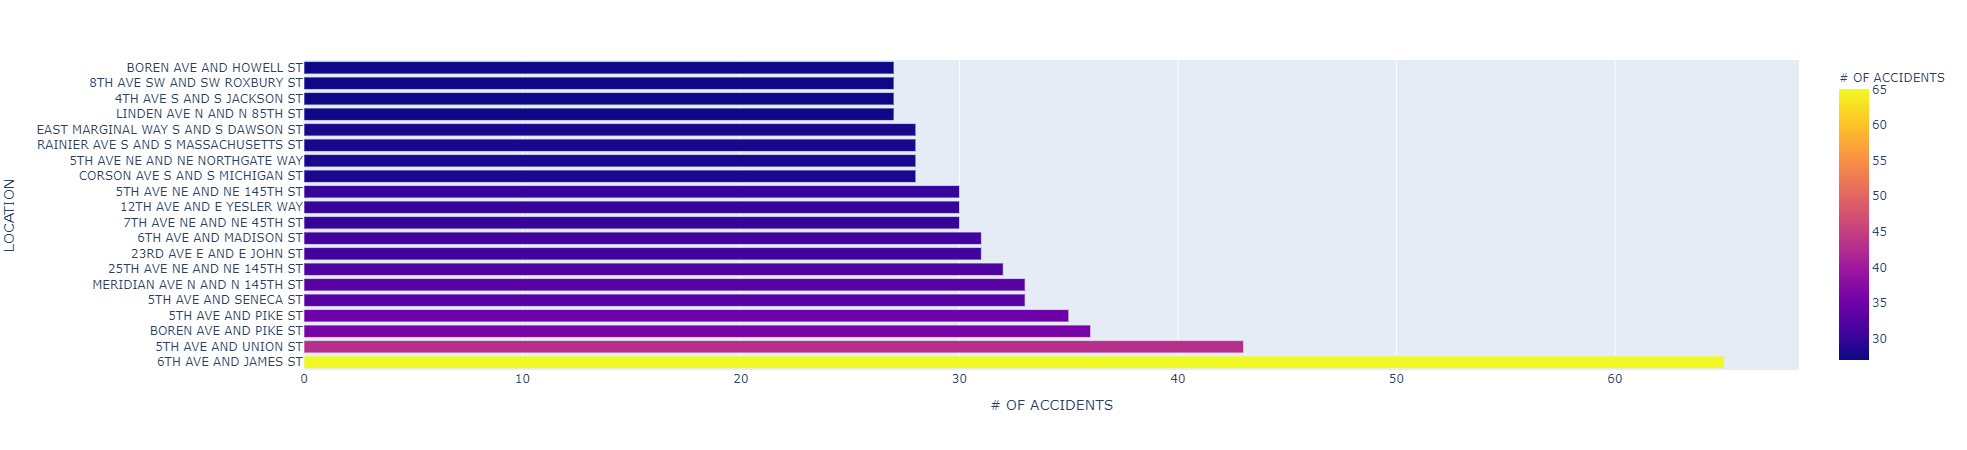

In [61]:
df1 = df[df['INCDATE'].dt.year > 2016]
a= df1.groupby(['INTKEY','LOCATION'])['OBJECTID'].count() #,
a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns={'OBJECTID':'# OF ACCIDENTS'}, inplace=True)
bins = [0, 10, 20, 30, 40,50,120]
labels = ['Below 10', 'Between 10 and 20','Between 20 and 30','Between 30 and 40','Between 40 and 50',
         'Above 50']
a['BINNED'] = pd.cut(a['# OF ACCIDENTS'], bins, labels=labels)
a = a.sort_values(by=['# OF ACCIDENTS'],ascending=False)
b = a.head(20)
fig = px.bar(b, x="# OF ACCIDENTS", y="LOCATION", color="# OF ACCIDENTS")
fig.show()

Location "6th AVE AND JAMES ST" has abnormally high number of collisions since 2016

## Road and Lighting Conditions

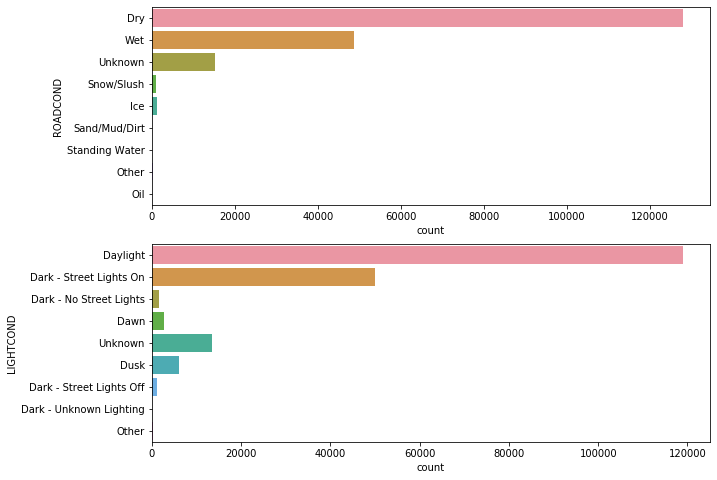

In [62]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(y=df['ROADCOND'], ax=ax[0],orient="h")
sns.countplot(y=df['LIGHTCOND'], ax=ax[1],orient="h")
# plt.savefig('./blog/33.png')

In [63]:
df["LIGHTCOND"].unique()

array(['Daylight', nan, 'Dark - Street Lights On',
       'Dark - No Street Lights', 'Dawn', 'Unknown', 'Dusk',
       'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Other'],
      dtype=object)

In [74]:
df[(df["SEVERITYCODE"]=="1")]["LIGHTCOND"].value_counts()

Daylight                    76345
Dark - Street Lights On     33369
Unknown                     11866
Dusk                        3889 
Dawn                        1630 
Dark - No Street Lights     1139 
Dark - Street Lights Off    851  
Other                       154  
Dark - Unknown Lighting     12   
Name: LIGHTCOND, dtype: int64

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
ax[0,0].pie(df[(df["SEVERITYCODE"]=="1")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,1].pie(df[(df["SEVERITYCODE"]=="2")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,2].pie(df[(df["SEVERITYCODE"]=="2b")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[0,3].pie(df[(df["SEVERITYCODE"]=="3")]["ROADCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})

ax[0,0].set_title("Property Damage Only Collision",color="grey")
ax[0,1].set_title("Injury Collision",color="grey")
ax[0,2].set_title("Serious Injury Collision",color="grey")
ax[0,3].set_title("Fatal Collision",color="grey")


ax[1,0].pie(df[(df["SEVERITYCODE"]=="1")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,1].pie(df[(df["SEVERITYCODE"]=="2")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,2].pie(df[(df["SEVERITYCODE"]=="2b")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})
ax[1,3].pie(df[(df["SEVERITYCODE"]=="3")]["LIGHTCOND"].value_counts(), textprops={'color':"white", 'fontsize': 14})


ax[0,3].legend(["Dry","Wet","Unknown","Ice","Snow/Slush","Other","Standing Water","Sand/Mud/Dirt","Oil"],
          title="Road Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax[1,3].legend(["Daylight","Dark-Street Light On","Unknown","Dawn","Dark-No Street Lights","Dark-Street Light Off","Other","Dark-Unknown Lighting"],
          title="Light Condition",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# plt.savefig('./blog/34.png')
plt.show()

Severe accidents are relatively less in daylight

## Effect of COVID-19 pandemic on vehicle collisions

In 2020, whole world faced a pandemic of the COVID-19 outbreak. Its effect on travel behaviour have also been sudden and wide ranging. 

In [65]:
a = df[df['YEAR']!=2020].groupby(['MONTH'])['OBJECTID'].count()/df[df['YEAR']!=2020].groupby(['MONTH']).size().nunique()
a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns = {'OBJECTID':'2013-2019'}, inplace=True)
b= df[df['YEAR']==2020].groupby(['MONTH'])['OBJECTID'].count()
b = b.to_frame()
b.reset_index(inplace=True)
b.rename(columns = {'OBJECTID':'2020'}, inplace=True)
# merging dataframes
df_compare = pd.merge(a, b, on='MONTH', how='left')

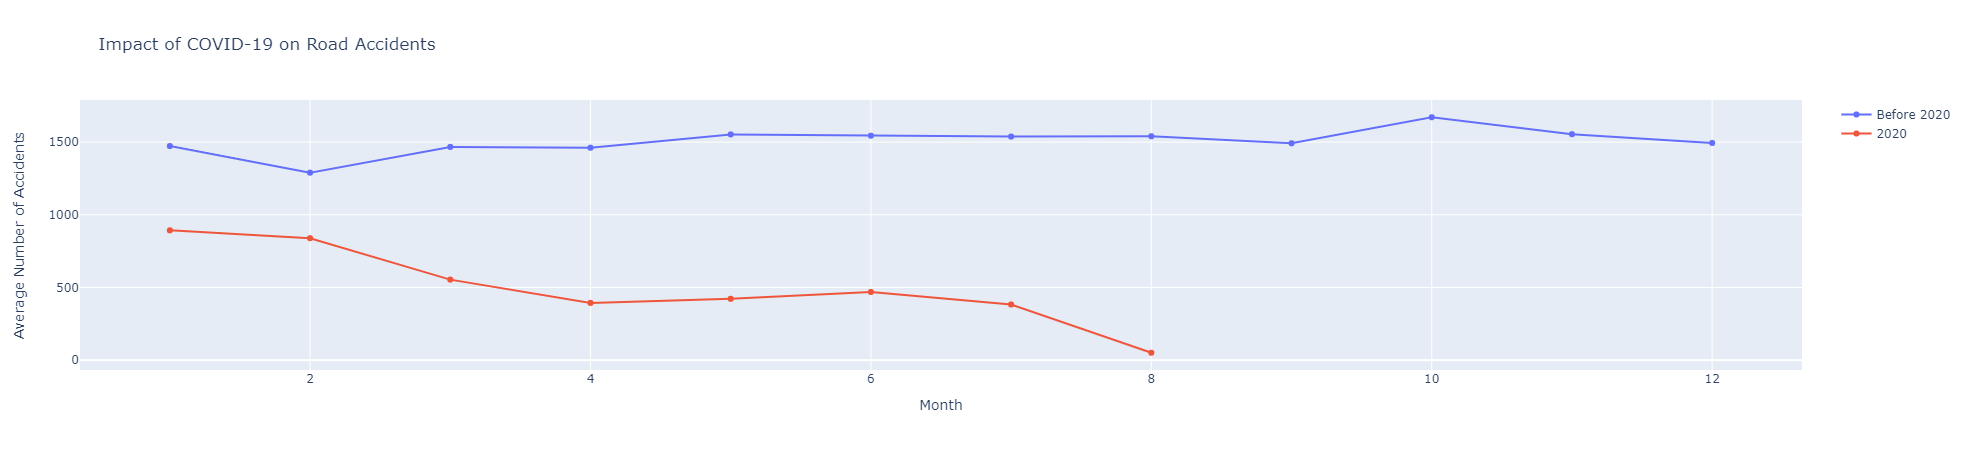

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_compare['MONTH'], y=df_compare['2013-2019'],mode='lines+markers', 
                         name='Before 2020'))
fig.add_trace(go.Scatter(x=df_compare['MONTH'], y=df_compare['2020'],mode='lines+markers',
                        name='2020'))
fig.update_layout(title="Impact of COVID-19 on Road Accidents",
                  xaxis_title='Month',
                  yaxis_title='Average Number of Accidents'
                 )
# plt.savefig('./blog/35.png')
fig.show()

We can see that there is a sudden drop in accident cases in 2020, due to COVID-19 pandemic

## Collisions on Map

In [67]:
sf_map = folium.Map(location=[df["Y"].mean(), df["X"].mean()],  zoom_start=12, control_scale=True, min_zoom=11)

df_filtered = df[(df["YEAR"]>= 2014)]
HeatMap(data=df_filtered[["X","Y","VEHCOUNT"]].groupby(['Y', 'X']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(sf_map)

sf_map

In [68]:
def color_change(c):
    if(c < 15):
        return('red')
    elif(15 <= c < 30):
        return('orange')
    else:
        return('green')
# Create base map
df.dropna(subset=["Y","X"], inplace=True)
df_filtered_1 = df[df["INCDATE"].dt.year>2018]

seattle = [df_filtered_1['Y'].mean(), df_filtered_1['X'].mean()]
map1 = folium.Map(location = seattle,
                 zoom_start = 12, 
                 tiles = "CartoDB positron")
marker_cluster = MarkerCluster(locations=[df_filtered_1['Y'], df_filtered_1['X']]).add_to(map1)

In [69]:
# Plot markers
for _lat, _lon, _cap, _name in zip(df_filtered_1['Y'], df_filtered_1['X'], df_filtered_1['VEHCOUNT'], df_filtered_1["REPORTNO"]):
    folium.CircleMarker(location = [_lat, _lon], 
                        radius = 9, 
                        popup = _name, 
                        fill_color = color_change(_cap), 
                        color = "gray", 
                        fill_opacity = 0.9).add_to(marker_cluster)

map1

KeyboardInterrupt: 

We can see density of accident is greater in Central Seattle, around University Road and First Hill

### Conclusion
After the thorough analysis, we have a better understanding of the causes and reasons for major road accidents. We see that although only 26% of accidents involve any injury, the number is still too high. The majority of the cases happen between the afternoon and evening, thus people driving during these hours should be more careful. The visuals convey to us that severity of the accident is higher during the day than late night, something we thought wasn't likely. We also see that speeding causes more accidents late at night. Additionally, in night-time accidents primarily happen because of less visibility. Thus, drivers should avoid speeding and be more careful during the night to avoid accidents. The data tells us that severe accidents more likely happen at blocks or intersections, as expected.

Moreover, we see that there is a spike I drunken driving cases during December (holiday season), the law enforcement should particularly take care during this time for such incidents. Here we see that utilizing analysis on top of the visuals entails one to bring out insights that may lead to a breakthrough, like the chances of being in an accident while turning left are more than while turning right. This information forms the core of the data analysis process. An effective, well-designed, and beautiful visualization is great but you shouldn't lose the context hidden in data art and must focus upon data-driven decisions that may engage your stakeholders. It is crucial to be a good visual storyteller rather than a visual artist, bringing out stories from data is what companies seek and require.